# Kannusteet, työllistymis- ja efektiivinen veroaste
Antti Tanskanen,
24.1.2024

Kannustava soviteltu työttömyysturva.

In [1]:
# for Colab, install fin_benefits from Github
#!pip install git+https://github.com/ajtanskanen/benefits.git

In [2]:
# haetaan tarpeelliset kirjastot
import fin_benefits # määrittelee luokan, jossa on sosiaaliturvafunktiot yms
import numpy as np 

# kuvat suuremmiksi
import matplotlib.pyplot as plt


In [3]:
plt.rcParams['figure.figsize'] = [10, 5]

## Tyyppitapauksia ja niiden korvausasteita

Laskee työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [4]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=14,tulosta=True)

Perhe, jossa 2 aikuista ja 1 lasta. Lapsista 1 on päivähoidossa. Työtön (ansiopaivaraha, vakiintunut ansio 2500 e/kk), puoliso töissä (palkka 2500 e/kk). Asumismenot asumistuessa 850 e/kk


Tarkastetaan vielä, millaisia parametrejä p:hen on syötetty

Itse laskenta koostuu kahdesta rivistä koodia. Alustetaan objektia ben kirjastosta fin_benefits. Tämän jälkeen sitä voi kutsua laskemaan marginaalit ja plottamaan ne.

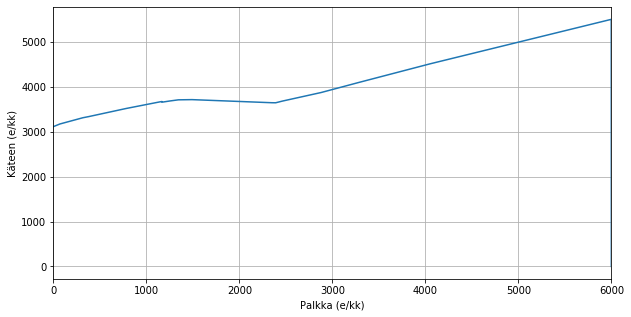

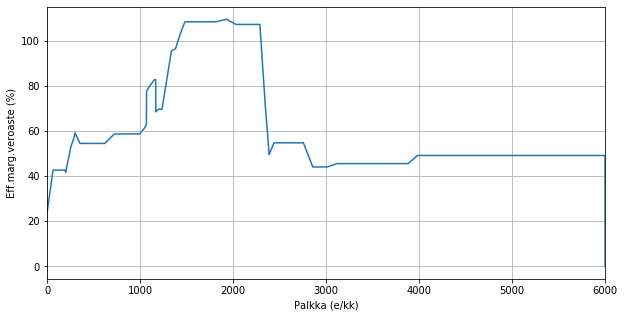

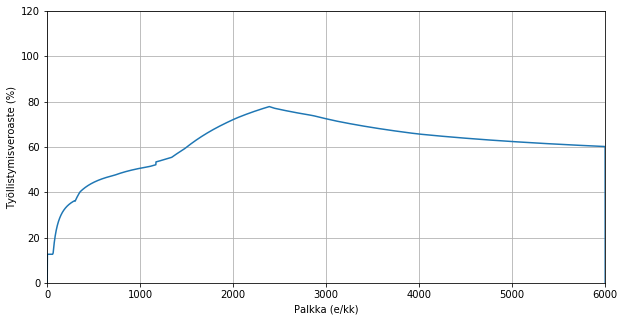

In [5]:
# Luokka Benefits() sisältää koodin
ben=fin_benefits.Benefits()

# ja lasketaan & plotataan tulokset
basenetto,baseeff,basetva=ben.laske_ja_plottaa(p)

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

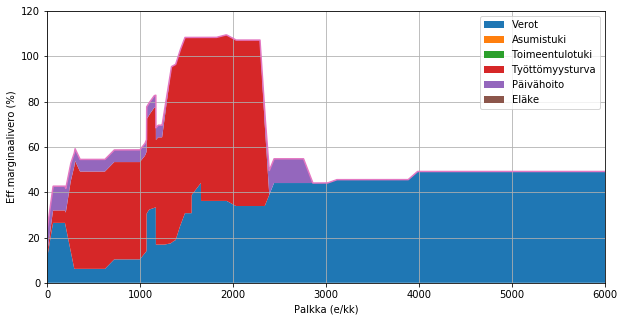

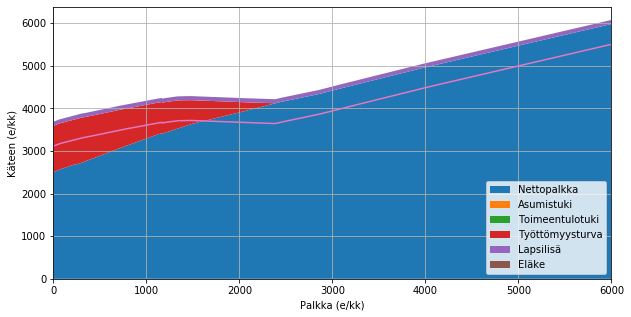

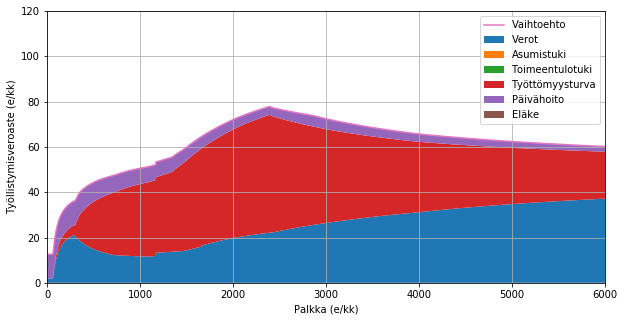

In [6]:
# ja lasketaan & plotataan tulokset
ben.laske_ja_plottaa_marginaalit(p)

# EK:n malli sovitellun päivärahan muuttamiseksi
Etuuslajien muokkaaminen on helppoa: kopioidaan luokka Benefits ja korvataan haluttu etuusmuoto uudella.

Esimerkin vuoksi korvataan toimeentulotuki yhteensovittamattomalla 750 e/kk tuella. Tämä on eräänlainen perustulo, mutta se ei ole kustannusneutraali ilman muutoksia verotukseen

In [17]:
import math
import gym
from gym import spaces, logger, utils, error
from gym.utils import seeding
import numpy as np
import random

class Benefits2020(fin_benefits.Benefits):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        #self.muuta_ansiopv_ylaraja=True
        #self.ansiopvraha_kesto400=350/(12*21.5) # lyhennetty 50 pv
        #self.ansiopvraha_kesto300=250/(12*21.5)   
        #self.toe_vaatimus=1.0 # työssäoloehto väh 12kk   
        #self.porrastus=True
        #self.muuta_ansiopv_ylaraja=True
        #self.muuta_pvhoito=True                  

    def ansiopaivaraha2018(self,tyoton,vakiintunutpalkka,lapsia,tyotaikaisettulot,saa_ansiopaivarahaa,kesto,p,ansiokerroin=1.0,kesto_400=True):
        ansiopvrahan_suojaosa=p['ansiopvrahan_suojaosa']
        lapsikorotus=p['ansiopvraha_lapsikorotus']
    
        if tyoton>0:
            if lapsikorotus<1:
                lapsia=0    

            if self.vuosi==2018:
                lapsikorotus=np.array([0,5.23,7.68,9.90])*21.5    
                sotumaksu=0.0448     # 2015 0.0428 2016 0.0460
                taite=3078.60    
            elif self.vuosi==2019:
                lapsikorotus=np.array([0,5.23,7.68,9.90])*21.5    
                sotumaksu=0.0448     # 2015 0.0428 2016 0.0460
                taite=3078.60    
            elif self.vuosi==2020:
                lapsikorotus=np.array([0,5.23,7.68,9.90])*21.5    
                sotumaksu=0.0448     # 2015 0.0428 2016 0.0460
                taite=3078.60    
            else:
                lapsikorotus=np.array([0,5.23,7.68,9.90])*21.5    
                sotumaksu=0.0448     # 2015 0.0428 2016 0.0460
                taite=3078.60    
                            
            if (saa_ansiopaivarahaa>0): # & (kesto<400.0): # ei keston tarkastusta!
                perus=self.peruspaivaraha(0)     # peruspäiväraha lasketaan tässä kohdassa ilman lapsikorotusta
                vakpalkka=vakiintunutpalkka*(1-sotumaksu)     
        
                if vakpalkka>taite:
                    tuki2=0.2*max(0,vakpalkka-taite)+0.45*max(0,taite-perus)+perus    
                else:
                    tuki2=0.45*max(0,vakpalkka-perus)+perus    

                tuki2=tuki2+lapsikorotus[min(lapsia,3)]    
                tuki2=tuki2*ansiokerroin # mahdollinen porrastus tehdään tämän avulla
                suojaosa=self.tyottomyysturva_suojaosa(ansiopvrahan_suojaosa)    
        
                perus=self.peruspaivaraha(lapsia)     # peruspäiväraha lasketaan tässä kohdassa lapsikorotukset mukana
                if tuki2>.9*vakpalkka:
                    tuki2=max(.9*vakpalkka,perus)    

                #if tuki2>.9*vakpalkka:
                #    tuki2=max(.9*vakpalkka,perus)    
        
                vahentavattulo=max(0,tyotaikaisettulot-suojaosa)    
                ansiopaivarahamaara=max(0,tuki2-0.5*vahentavattulo)  
                #maksi=min(ansiopaivarahamaara,0.7*max(0,vakiintunutpalkka-tyotaikaisettulot))   
                #ansiopaivarahamaara=self.ansiopaivaraha_ylaraja(ansiopaivarahamaara,tyotaikaisettulot,vakpalkka,vakiintunutpalkka)  
                #if vakpalkka<ansiopaivarahamaara+tyotaikaisettulot:
                #    ansiopaivarahamaara=max(0,vakpalkka-tyotaikaisettulot)    

                tuki=ansiopaivarahamaara    
                perus=self.soviteltu_peruspaivaraha(lapsia,tyotaikaisettulot,ansiopvrahan_suojaosa)
                tuki=max(perus,tuki)     # voi tulla vastaan pienillä tasoilla
            else:
                ansiopaivarahamaara=0    
                perus=self.soviteltu_peruspaivaraha(lapsia,tyotaikaisettulot,ansiopvrahan_suojaosa)    
                tuki=perus    
        else:
            perus=0    
            tuki=0    
            ansiopaivarahamaara=0   
        
        return tuki,ansiopaivarahamaara,perus
        
    # yläraja 80% ansionalenemasta
    def ansiopaivaraha_ylaraja(self,ansiopaivarahamaara,tyotaikaisettulot,vakpalkka,vakiintunutpalkka):
        #if self.muuta_ansiopv_ylaraja:
        return min(ansiopaivarahamaara,0.7*max(0,vakiintunutpalkka-tyotaikaisettulot))   
        #else:
        #return super().ansiopaivaraha_ylaraja(ansiopaivarahamaara,tyotaikaisettulot,vakpalkka,vakiintunutpalkka)        
     
    def toimeentulotuki(self,omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=0.07):
        return super().toimeentulotuki(omabruttopalkka,omapalkkavero,puolison_bruttopalkka,puolison_palkkavero,muuttulot,verot,asumismenot,muutmenot,p,omavastuuprosentti=omavastuuprosentti)


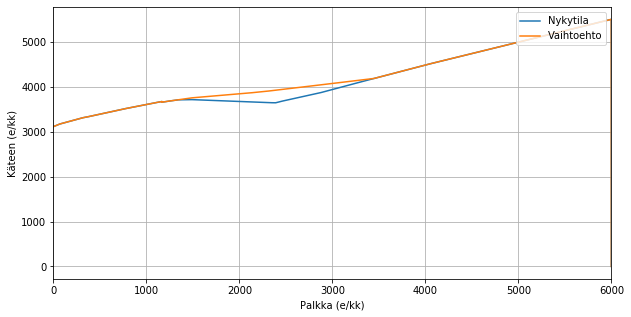

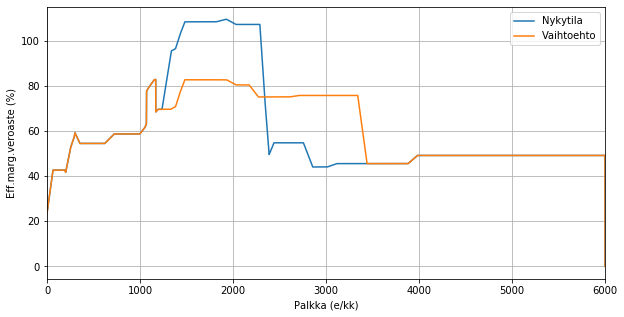

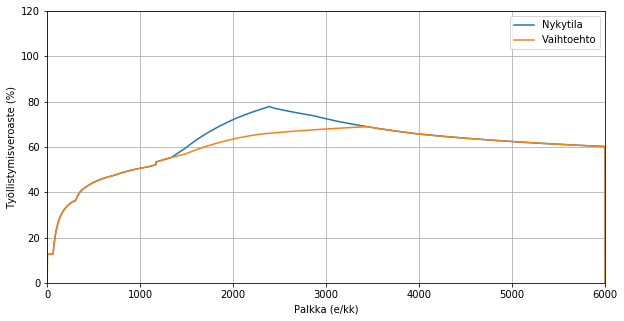

In [18]:
# Luokka Suurempituki() sisältää koodin
parempi=Benefits2020()

# ja lasketaan & plotataan tulokset
_,_,_=parempi.laske_ja_plottaa(p,basenetto=basenetto,baseeff=baseeff,basetva=basetva)

# Kokoelma esimerkkitapauksia

In [8]:
# tämän laskenta on aika hidasta
plt.rcParams['figure.figsize'] = [15, 35]
#ben.laske_ja_plottaa_hila(type='tva')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018